In [1]:
from __future__ import division
from __future__ import print_function
import matplotlib.pyplot as plt
%matplotlib inline

# 目标
- 如何找到凸缺。
- 计算点到多边形的最短距离。
- 不同形状的匹配。

# 1. 理论与代码
## 1.1 凸缺
目标与其凸包的差异被称为凸缺。OpenCV提供了**cv2.convexityDefects()**来计算凸缺。该函数的调用如下所示：
``` Python
hull = cv2.convexHull(cnt, returnPoints = False)
defects = cv2.convexityDefects(cnt, hull)
```

> **注意**  
> 记住要把**returnPoints**设置为**False**，以使用凸缺检测函数。

该函数返回一个数组，每一行包含以下的值：**[开始点，结束点、最远点、到最远点的近似距离]**。下面用一幅来可视化凸缺：从开始点到结束点绘制一条线段，在最远点处绘制一个圆。注意：前三个值返回的是**cnt**的索引。 

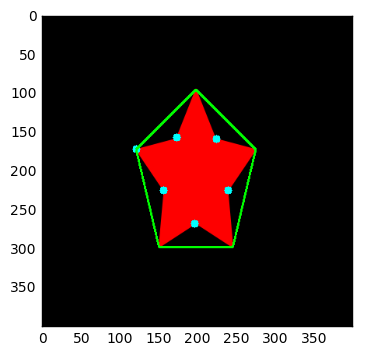

In [25]:
import numpy as np
import cv2

img = cv2.imread('../data/star1.jpg')
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(img_gray, 50, 255, cv2.THRESH_BINARY)
_, contours, hierarchy = cv2.findContours(thresh, cv2.RETR_CCOMP, cv2.CHAIN_APPROX_SIMPLE)
cnt = contours[0]

hull = cv2.convexHull(cnt, returnPoints=False)
defects = cv2.convexityDefects(cnt, hull)

for i in range(defects.shape[0]):
    s, e, f, d = defects[i][0]
    start = tuple(cnt[s][0])
    end = tuple(cnt[e][0])
    far = tuple(cnt[f][0])
    cv2.line(img, start, end, (0, 255, 0), 2)
    cv2.circle(img, far, 5, [255, 255, 0], -1)
    
plt.imshow(img[:, :, ::-1])

## 1.2 点-多边形测试
**cv2.pointPolyonTest()**函数可以计算图像中的一个点到等值线之间的最短距离。当点位于等值线之外时，返回值为负数；点位于等值线之内时，返回正数。

下面的例子计算了$(50, 50)$到等值线的距离：

In [26]:
dist = cv2.pointPolygonTest(cnt, (50, 50), True)
print(dist)

-141.15594213493105


该函数第三个参数为**measureDist**，设置为True时计算带符号的距离，若设置为False，则只计算点是在等值线的内部还是外部（分别返回$+1,0,-1$）。

> **注意**  
> 如果不想求距离，务必把**measureDist**设置为False，因为求距离时间消耗很高。

## 1.3 形状匹配
OpenCV提供了函数**cv2.matchShapes()**来比较两个形状或两个等值线，并返回其相似性度量。返回的值越小说明相似度越高。该函数基于**hu-moment value**来计算相似度，不同的度量方法参考文档中的解释。

Image A Matching Image A = 0.0
Image A Matching Image B = 0.0018274387183324081
Image A Matching Image C = 0.07074893589464176


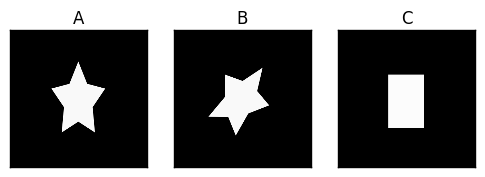

In [39]:
import cv2
import numpy as np

img1 = cv2.imread('../data/star1.jpg', cv2.IMREAD_GRAYSCALE)
img2 = cv2.imread('../data/star2.jpg', cv2.IMREAD_GRAYSCALE)
img3 = cv2.imread('../data/star3.jpg', cv2.IMREAD_GRAYSCALE)

_, thresh1 = cv2.threshold(img1, 50, 255, cv2.THRESH_BINARY)
_, thresh2 = cv2.threshold(img2, 50, 255, cv2.THRESH_BINARY)
_, thresh3 = cv2.threshold(img3, 50, 255, cv2.THRESH_BINARY)

_, contours, hierarchy = cv2.findContours(thresh1, 2, 1)
cnt1 = contours[0]
_, contours, hierarchy = cv2.findContours(thresh2, 2, 1)
cnt2 = contours[0]
_, contours, hierarchy = cv2.findContours(thresh3, 2, 1)
cnt3 = contours[0]


ret1 = cv2.matchShapes(cnt1, cnt1, 1, 0.0)
ret2 = cv2.matchShapes(cnt1, cnt2, 1, 0.0)
ret3 = cv2.matchShapes(cnt1, cnt3, 1, 0.0)

plt.subplot(131), plt.imshow(img1, 'gray'), plt.title('A')
plt.xticks([]), plt.yticks([])
plt.subplot(132), plt.imshow(img2, 'gray'), plt.title('B')
plt.xticks([]), plt.yticks([])
plt.subplot(133), plt.imshow(img3, 'gray'), plt.title('C')
plt.xticks([]), plt.yticks([])

print('Image A Matching Image A = {}'.format(ret1))
print('Image A Matching Image B = {}'.format(ret2))
print('Image A Matching Image C = {}'.format(ret3))

从上面的结果可以看到，即使形状进行了旋转也能够进行比较。

**补充说明**  
[Hu Moments](http://en.wikipedia.org/wiki/Image_moment#Rotation_invariant_moments)是对平移、旋转和缩放具有不变性的七个矩，第七个矩具有扭曲不变性。可以用**cv2.HuMoments()**来计算这些值。

# 2 更多资源
## 2.1 练习
1. 查看**cv2.pointPolygonTest()**的文档，可以看到一幅漂亮的红蓝颜色图像。该图像表达了所有像素到曲线的距离。曲线内的像素是蓝色，强度值依赖于距离；曲线外是红色。边缘是白色的。编写程序生成这样一幅图像。
2. 用**cv2.matchShape()**函数来比较数字或字符（这是OCR的一个简单步骤）。